In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tabulate import tabulate

In [2]:
#dataset loading and exploration
df=pd.read_csv("ifood_df.csv")
print(df.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
df.shape

(2205, 39)

In [8]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [16]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

In [14]:
#dataset cleaning
#missing value checking and eliminating
print(df.isna().sum())
print("\nSince no missing value, So no need to remove any values.")

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [15]:
#dropping Columns Z_CostContact and Z_Revenue as they have all the same values and these columns will not help us to understand our customers better.
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)


Outliers in MntWines:
Outlier threshold for 'MntWines' — Values < -700.50 or > 1231.50
Number of outliers: 34


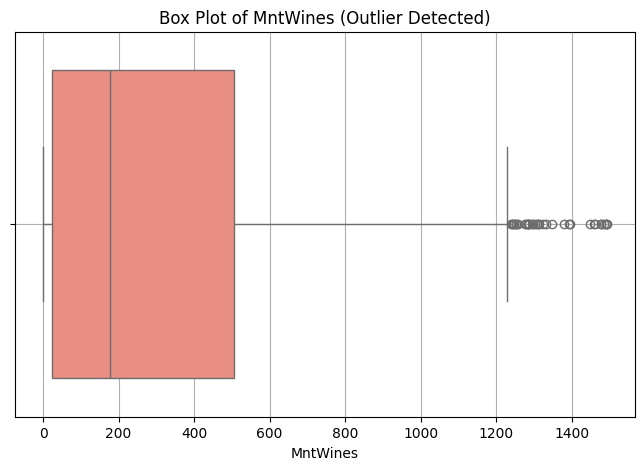


Outliers in MntFruits:
Outlier threshold for 'MntFruits' — Values < -44.50 or > 79.50
Number of outliers: 245


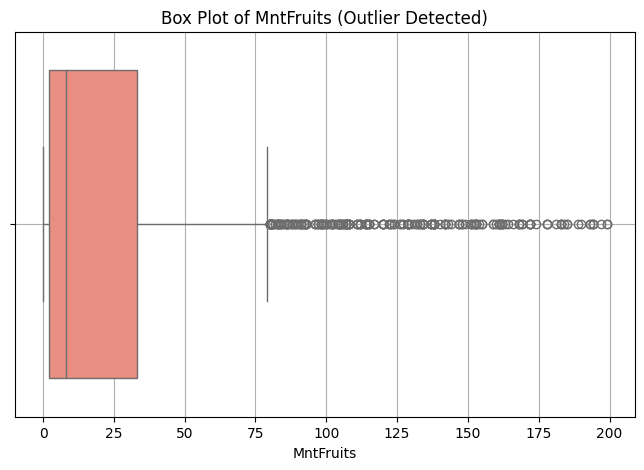


Outliers in MntMeatProducts:
Outlier threshold for 'MntMeatProducts' — Values < -308.00 or > 556.00
Number of outliers: 170


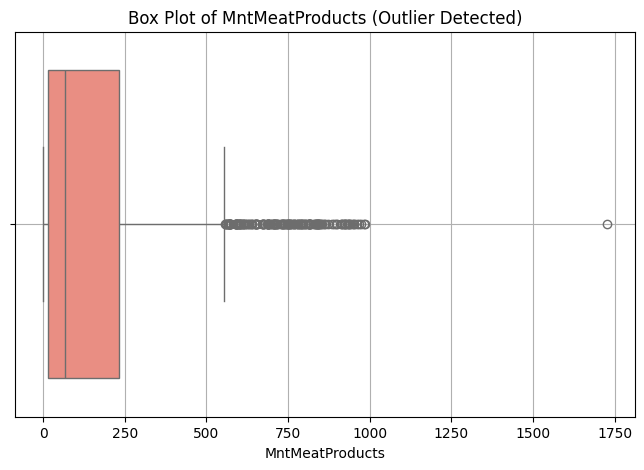


Outliers in MntFishProducts:
Outlier threshold for 'MntFishProducts' — Values < -67.50 or > 120.50
Number of outliers: 222


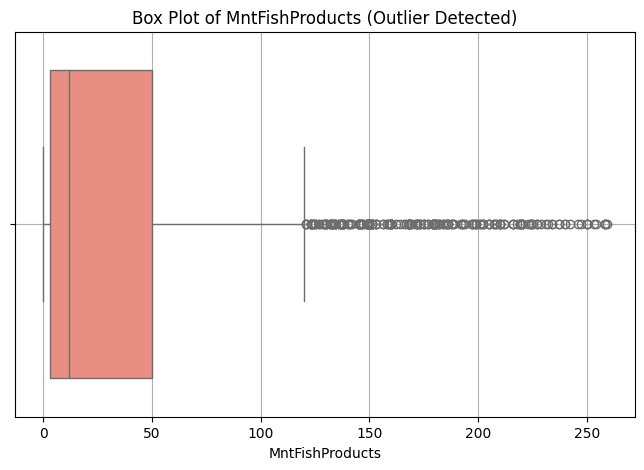


Outliers in MntSweetProducts:
Outlier threshold for 'MntSweetProducts' — Values < -48.50 or > 83.50
Number of outliers: 238


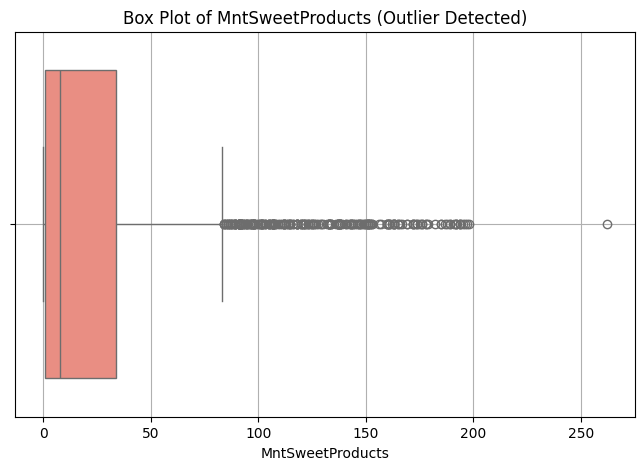


Outliers in MntGoldProds:
Outlier threshold for 'MntGoldProds' — Values < -61.50 or > 126.50
Number of outliers: 204


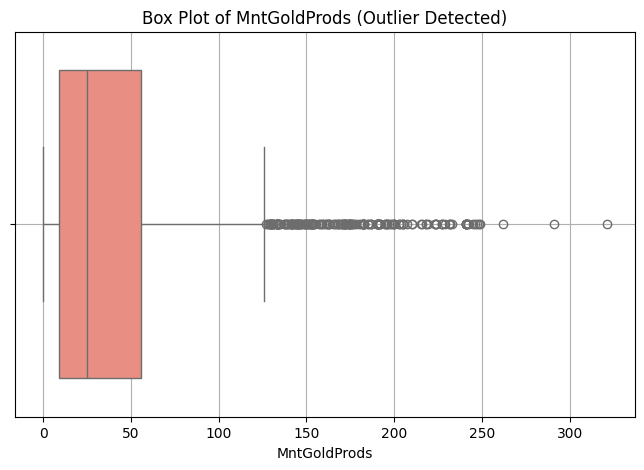


Outliers in NumDealsPurchases:
Outlier threshold for 'NumDealsPurchases' — Values < -2.00 or > 6.00
Number of outliers: 82


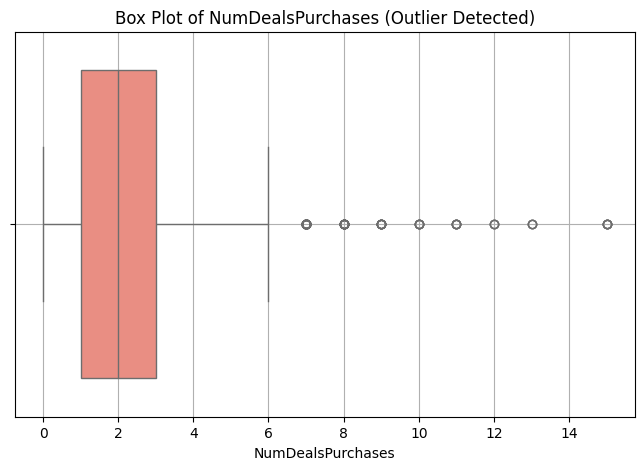


Outliers in NumWebPurchases:
Outlier threshold for 'NumWebPurchases' — Values < -4.00 or > 12.00
Number of outliers: 3


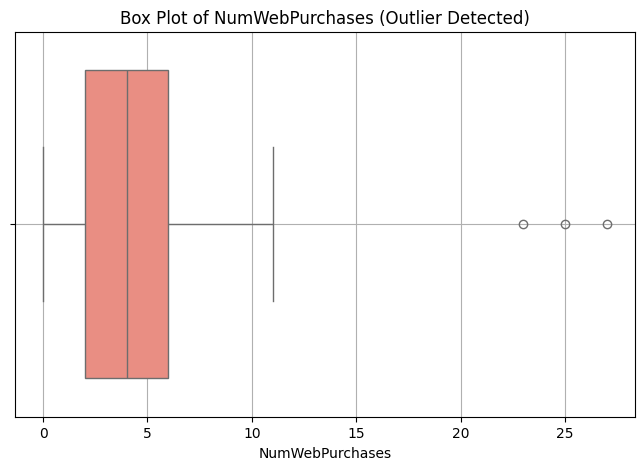


Outliers in NumCatalogPurchases:
Outlier threshold for 'NumCatalogPurchases' — Values < -6.00 or > 10.00
Number of outliers: 20


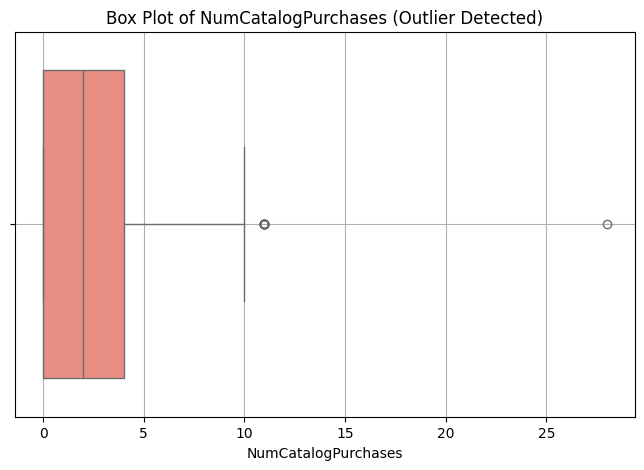


Outliers in NumWebVisitsMonth:
Outlier threshold for 'NumWebVisitsMonth' — Values < -3.00 or > 13.00
Number of outliers: 8


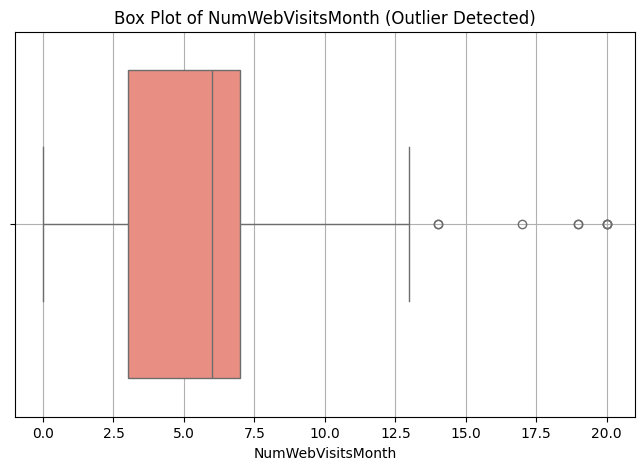


Outliers in AcceptedCmp3:
Outlier threshold for 'AcceptedCmp3' — Values < 0.00 or > 0.00
Number of outliers: 163


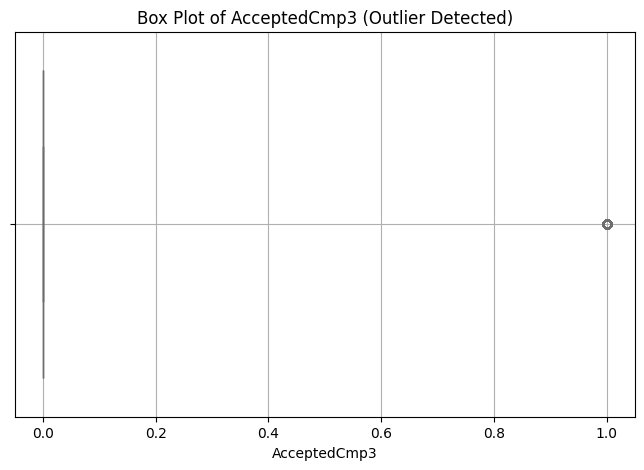


Outliers in AcceptedCmp4:
Outlier threshold for 'AcceptedCmp4' — Values < 0.00 or > 0.00
Number of outliers: 164


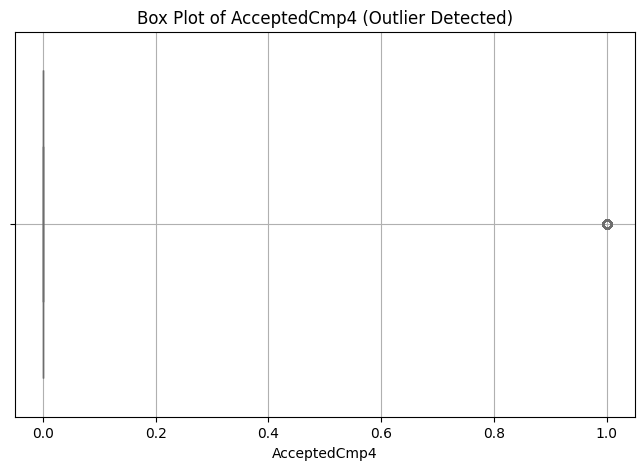


Outliers in AcceptedCmp5:
Outlier threshold for 'AcceptedCmp5' — Values < 0.00 or > 0.00
Number of outliers: 161


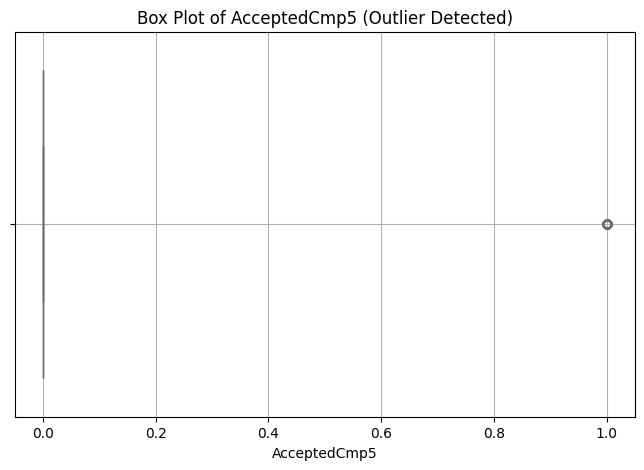


Outliers in AcceptedCmp1:
Outlier threshold for 'AcceptedCmp1' — Values < 0.00 or > 0.00
Number of outliers: 142


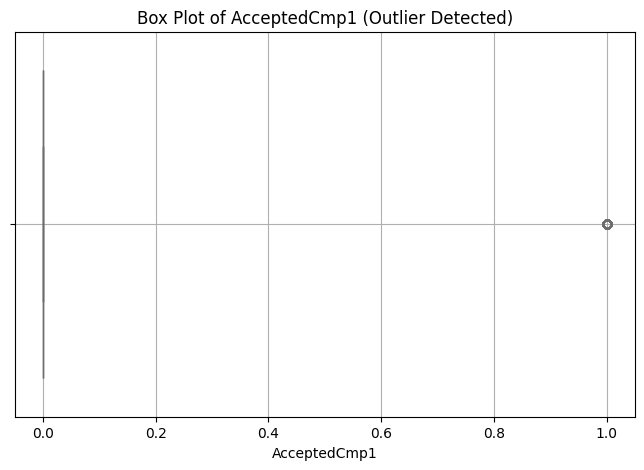


Outliers in AcceptedCmp2:
Outlier threshold for 'AcceptedCmp2' — Values < 0.00 or > 0.00
Number of outliers: 30


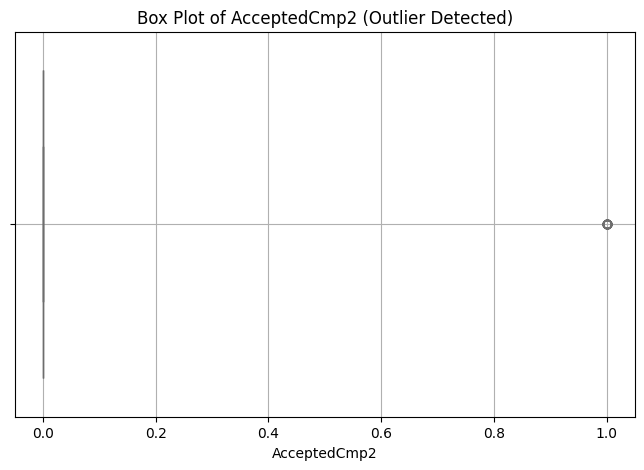


Outliers in Complain:
Outlier threshold for 'Complain' — Values < 0.00 or > 0.00
Number of outliers: 20


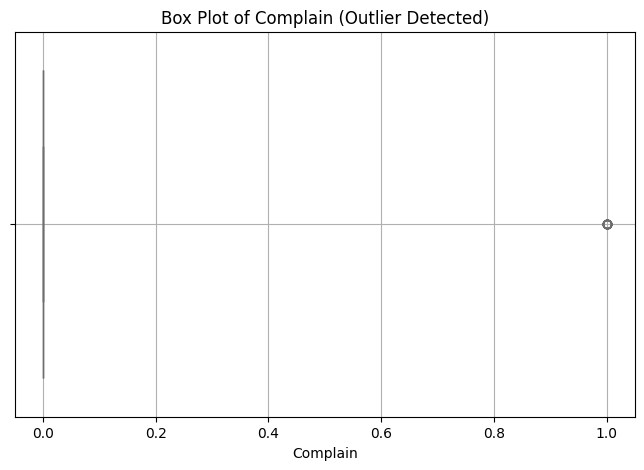


Outliers in Response:
Outlier threshold for 'Response' — Values < 0.00 or > 0.00
Number of outliers: 333


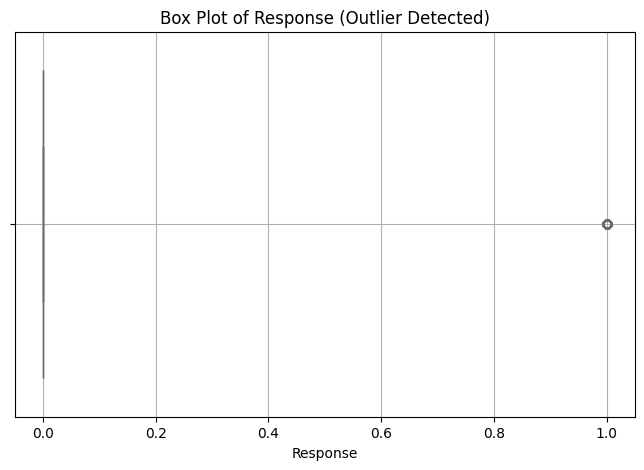


Outliers in marital_Divorced:
Outlier threshold for 'marital_Divorced' — Values < 0.00 or > 0.00
Number of outliers: 230


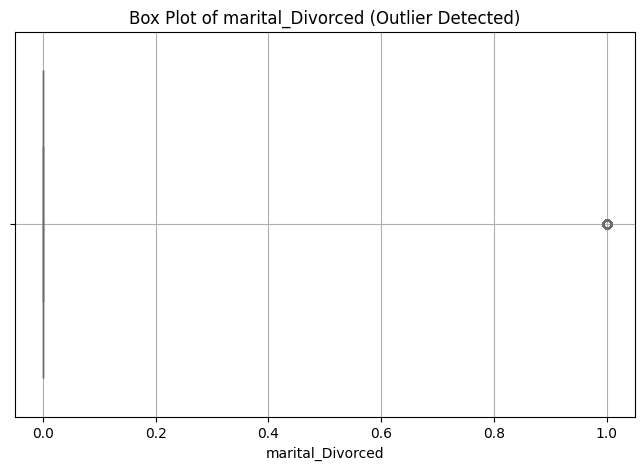


Outliers in marital_Single:
Outlier threshold for 'marital_Single' — Values < 0.00 or > 0.00
Number of outliers: 477


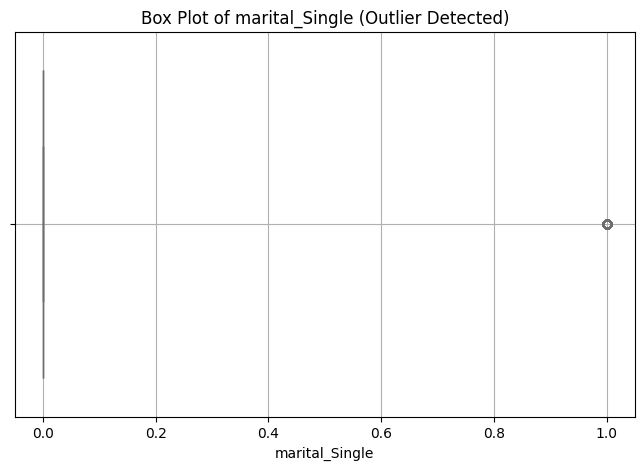


Outliers in marital_Widow:
Outlier threshold for 'marital_Widow' — Values < 0.00 or > 0.00
Number of outliers: 76


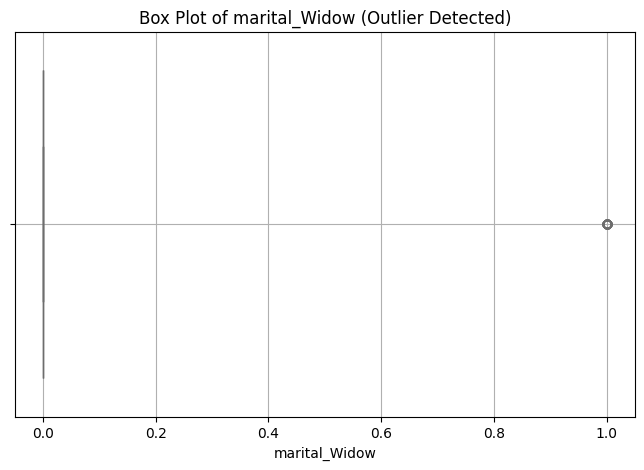


Outliers in education_2n Cycle:
Outlier threshold for 'education_2n Cycle' — Values < 0.00 or > 0.00
Number of outliers: 198


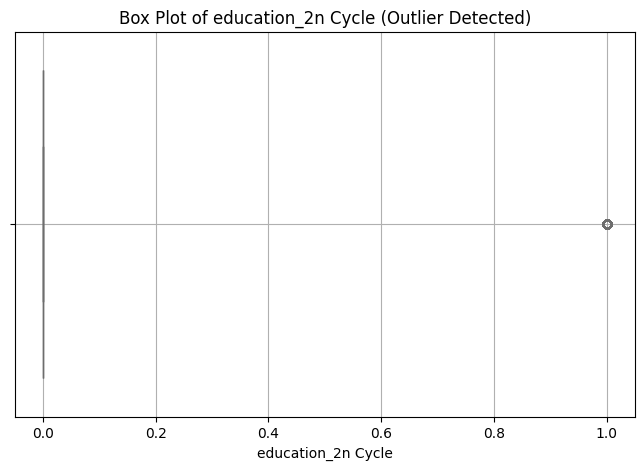


Outliers in education_Basic:
Outlier threshold for 'education_Basic' — Values < 0.00 or > 0.00
Number of outliers: 54


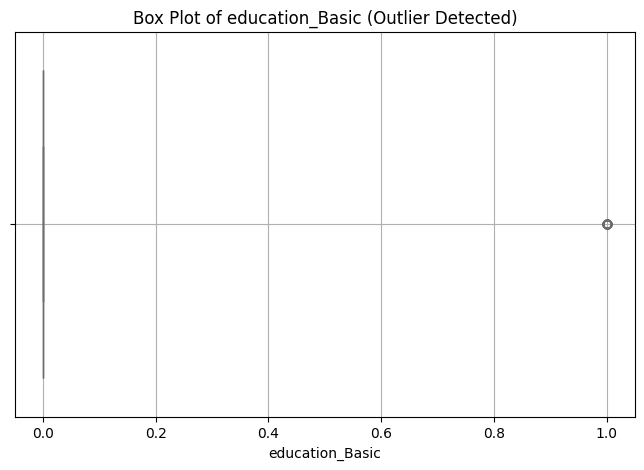


Outliers in education_Master:
Outlier threshold for 'education_Master' — Values < 0.00 or > 0.00
Number of outliers: 364


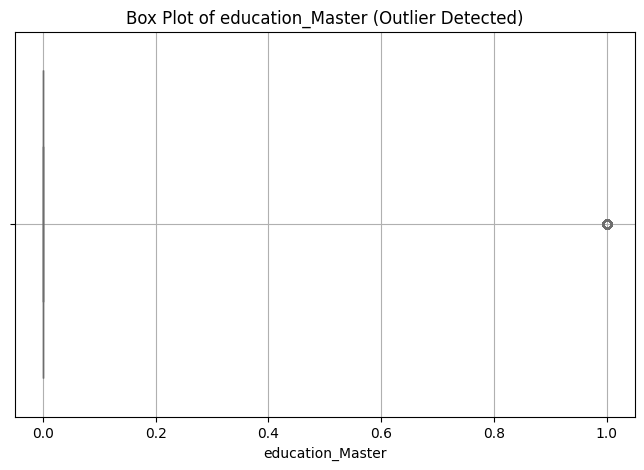


Outliers in education_PhD:
Outlier threshold for 'education_PhD' — Values < 0.00 or > 0.00
Number of outliers: 476


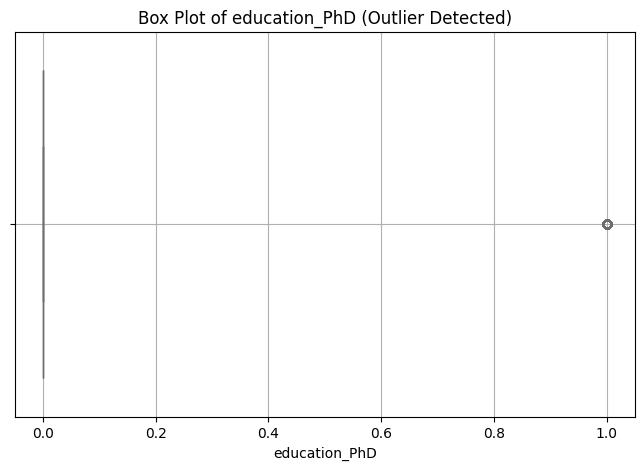


Outliers in MntTotal:
Outlier threshold for 'MntTotal' — Values < -1306.00 or > 2326.00
Number of outliers: 3


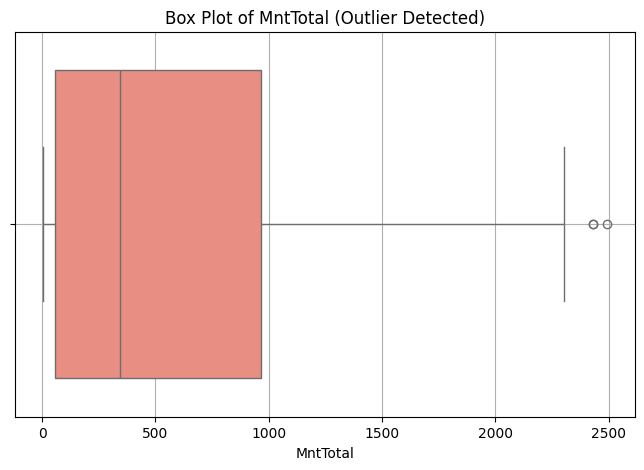


Outliers in MntRegularProds:
Outlier threshold for 'MntRegularProds' — Values < -1221.00 or > 2147.00
Number of outliers: 4


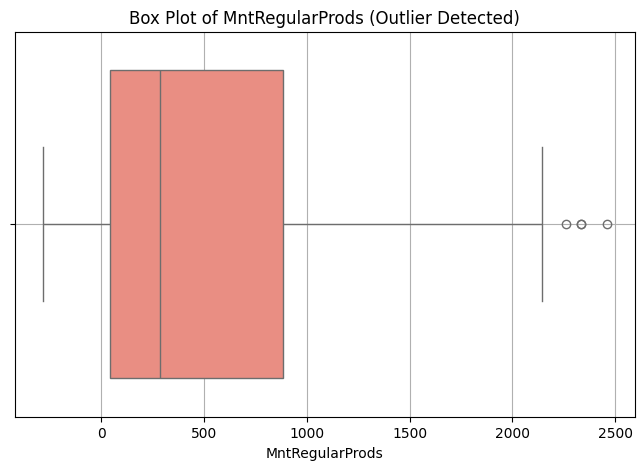


Outliers in AcceptedCmpOverall:
Outlier threshold for 'AcceptedCmpOverall' — Values < 0.00 or > 0.00
Number of outliers: 458


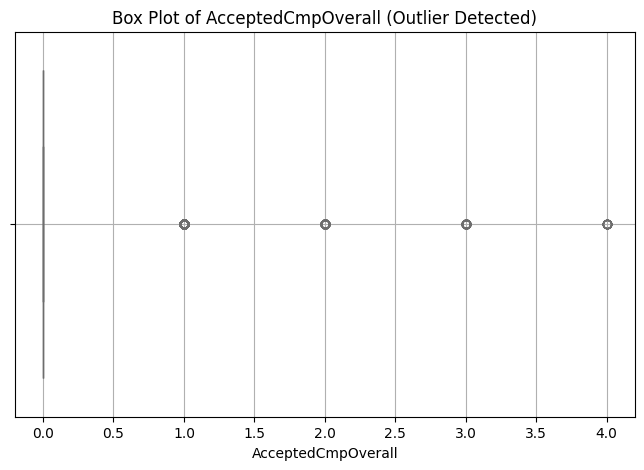


Total number of columns with outliers: 27
Columns with outliers: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'marital_Divorced', 'marital_Single', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


In [19]:
#outlier detection

# checks only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
outlier_cols=[]
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # detecting outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # If outliers exist, print and plot graph of that column
    if not outliers.empty:
        outlier_cols.append(col)
        print(f"\nOutliers in {col}:")
        print(f"Outlier threshold for '{col}' — Values < {lower_bound:.2f} or > {upper_bound:.2f}")
        print(f"Number of outliers: {len(outliers)}")

        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col], color='salmon')
        plt.title(f'Box Plot of {col} (Outlier Detected)')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()
        
print(f"\nTotal number of columns with outliers: {len(outlier_cols)}")
print(f"Columns with outliers: {outlier_cols}")

In [20]:
#filtering out the outliers
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    df=df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [22]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,...,321.000000,321.0,321.0,321.0,321.000000,321.0,321.000000,321.000000,321.000000,321.0
mean,33365.884735,0.878505,0.451713,50.202492,28.283489,3.208723,17.501558,5.485981,3.292835,10.386293,...,0.389408,0.0,0.0,0.0,0.747664,0.0,0.252336,57.772586,47.386293,0.0
std,10188.909699,0.488178,0.516907,28.829447,28.740499,4.744410,15.238956,6.511093,4.456201,10.784552,...,0.488377,0.0,0.0,0.0,0.435031,0.0,0.435031,41.168419,36.478423,0.0
min,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,6.000000,4.000000,0.0
25%,26091.000000,1.000000,0.000000,25.000000,8.000000,0.000000,7.000000,0.000000,0.000000,3.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,30.000000,19.000000,0.0
50%,33456.000000,1.000000,0.000000,49.000000,19.000000,2.000000,13.000000,3.000000,1.000000,6.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,43.000000,37.000000,0.0
75%,39898.000000,1.000000,1.000000,76.000000,35.000000,4.000000,21.000000,8.000000,5.000000,16.000000,...,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,69.000000,59.000000,0.0
max,61917.000000,2.000000,2.000000,99.000000,159.000000,34.000000,92.000000,38.000000,24.000000,59.000000,...,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,189.000000,159.000000,0.0


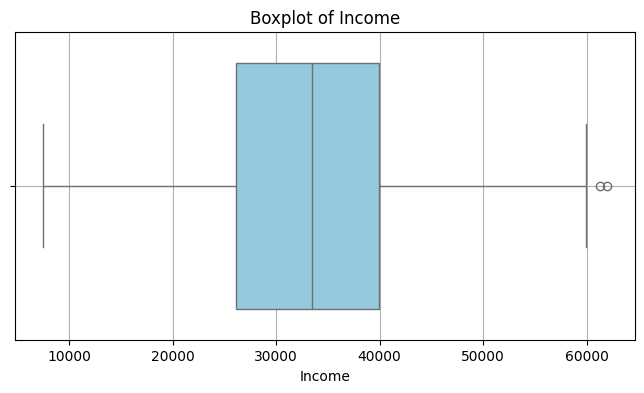

In [24]:
# Boxplot for Income
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Income'], color='skyblue')
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.grid(True)
plt.show()

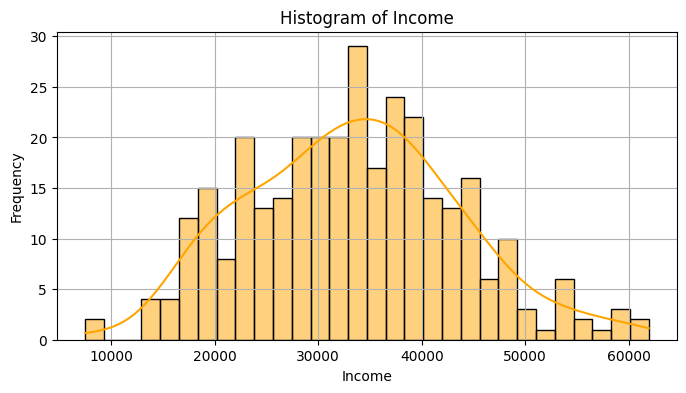

In [25]:
# Histogram for Income
plt.figure(figsize=(8, 4))
sns.histplot(df['Income'], kde=True, bins=30, color='orange')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

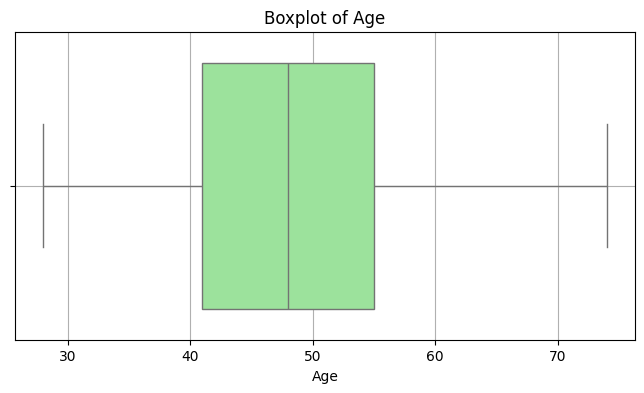

In [26]:
# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

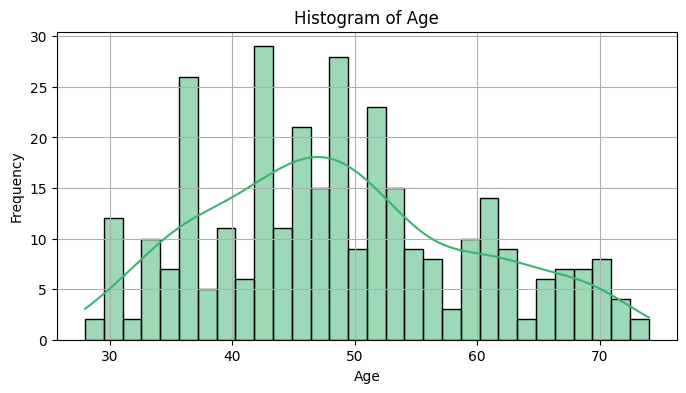

In [27]:
# Histogram for Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=30, color='mediumseagreen')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Correlation Matrix:
          MntTotal    Income       Age  Teenhome   Kidhome
MntTotal  1.000000  0.390968  0.027840  0.070778 -0.186103
Income    0.390968  1.000000  0.249065  0.425484  0.017171
Age       0.027840  0.249065  1.000000  0.581409 -0.138888
Teenhome  0.070778  0.425484  0.581409  1.000000 -0.054281
Kidhome  -0.186103  0.017171 -0.138888 -0.054281  1.000000


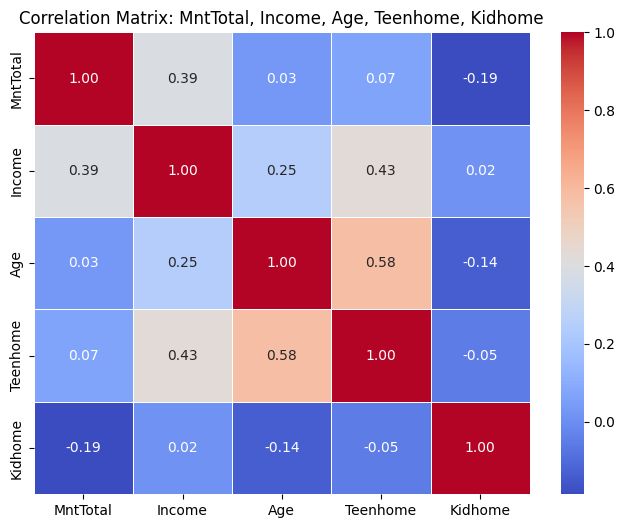

In [28]:
#correlation matrix
corr_cols = ['MntTotal', 'Income', 'Age', 'Teenhome', 'Kidhome']
corr_matrix = df[corr_cols].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: MntTotal, Income, Age, Teenhome, Kidhome')
plt.show()

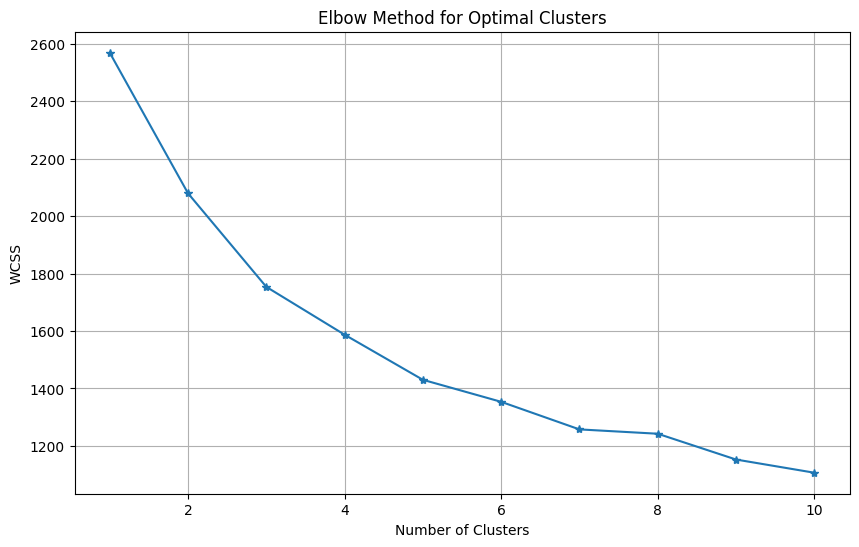


Cluster Analysis:
                Income  Total_Spending  Total_Purchases    Recency  \
Cluster                                                             
0        27596.162162       58.216216         8.081081  62.702703   
1        38547.857143      151.821429        10.017857  47.535714   
2        43872.357143       59.785714         6.628571  54.671429   
3        28418.082645       40.363636         5.347107  41.206612   

         Online_Activity  Campaign_Response  Total_Kids  Income_per_head  \
Cluster                                                                    
0               9.135135                0.0    1.756757      7414.691216   
1              10.160714                0.0    1.142857     12444.229167   
2               6.200000                0.0    1.700000     12280.862619   
3               8.338843                0.0    0.942149      9731.274931   

               Age  
Cluster             
0        50.540541  
1        47.339286  
2        57.457143  
3  

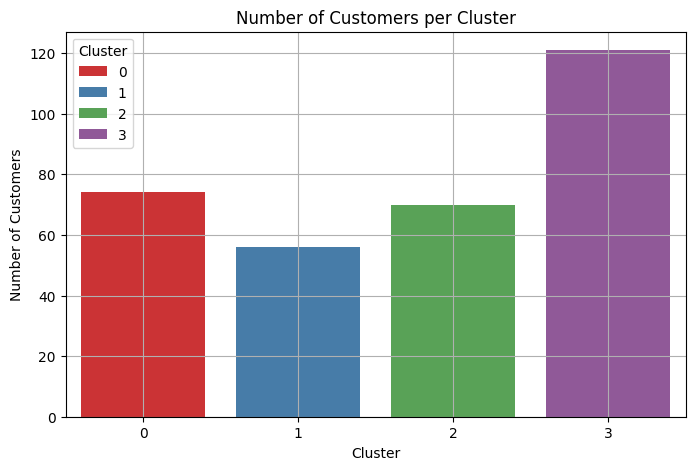

In [48]:
#Customer Segmentation
#1.Creating new features for customer segmentation
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 
                               'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

df['Online_Activity'] = df['NumWebPurchases'] + df['NumWebVisitsMonth']

df['Campaign_Response'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

df['Income_per_head'] = df['Income'] / (2 + df['Total_Kids'])

#2.Selecting features for clustering
cluster_features = ['Income', 'Total_Spending', 'Total_Purchases', 
                    'Recency', 'Online_Activity', 'Campaign_Response',
                    'Total_Kids', 'Income_per_head', 'Age']
X_cluster = df[cluster_features]

#3.Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 4.Elbow method to find optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='*')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#5.Applying KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#6.Analyzing clusters
cluster_analysis = df.groupby('Cluster')[cluster_features].mean()
print("\nCluster Analysis:\n", cluster_analysis)

#Counting number of customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nNumber of customers in each cluster:")
print(cluster_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set1')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


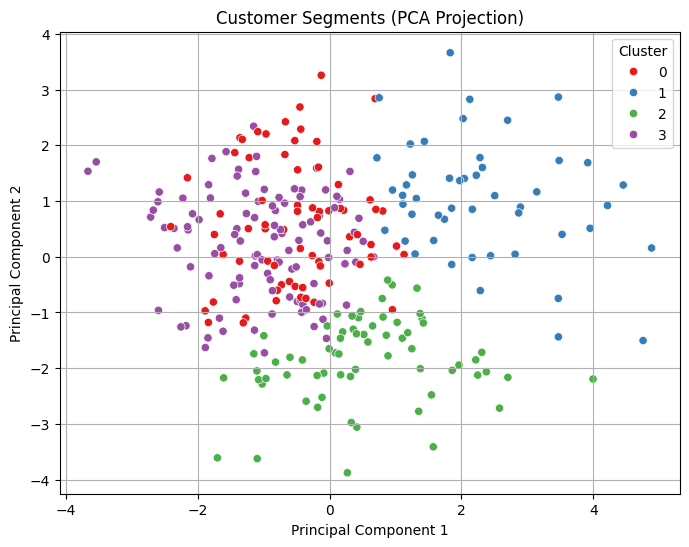

In [42]:
#7.PCA for Visualization
pca = PCA(n_components=2,random_state=42)
pca_components = pca.fit_transform(X_scaled)
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

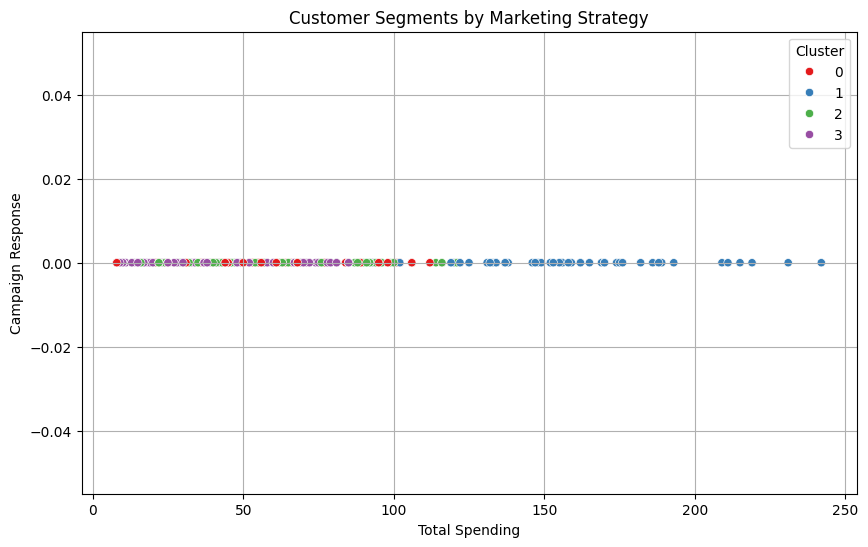

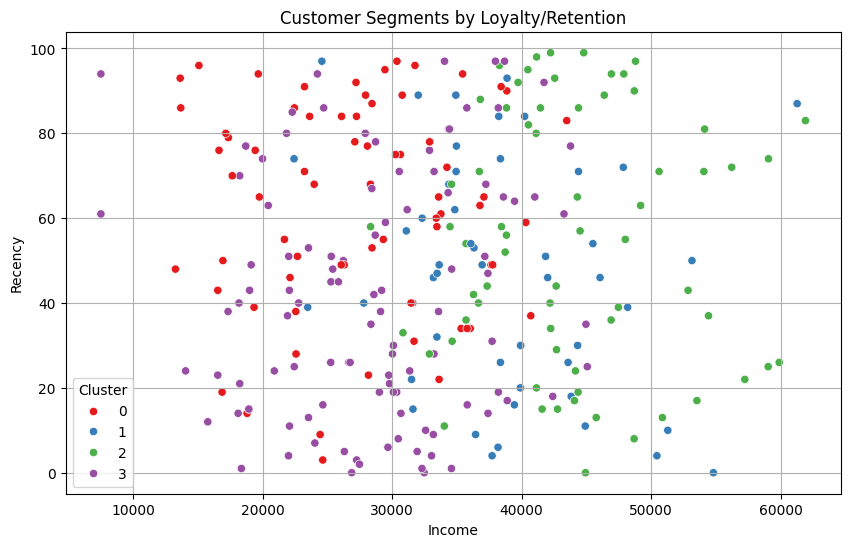

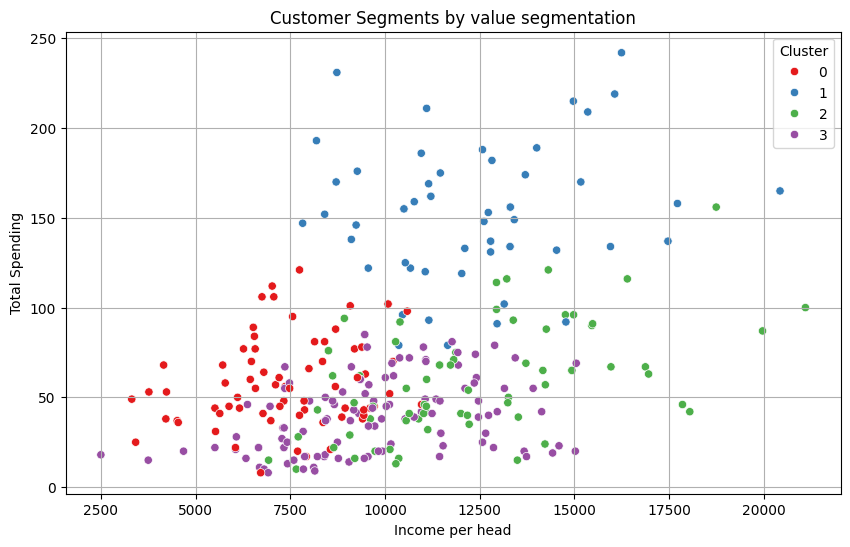

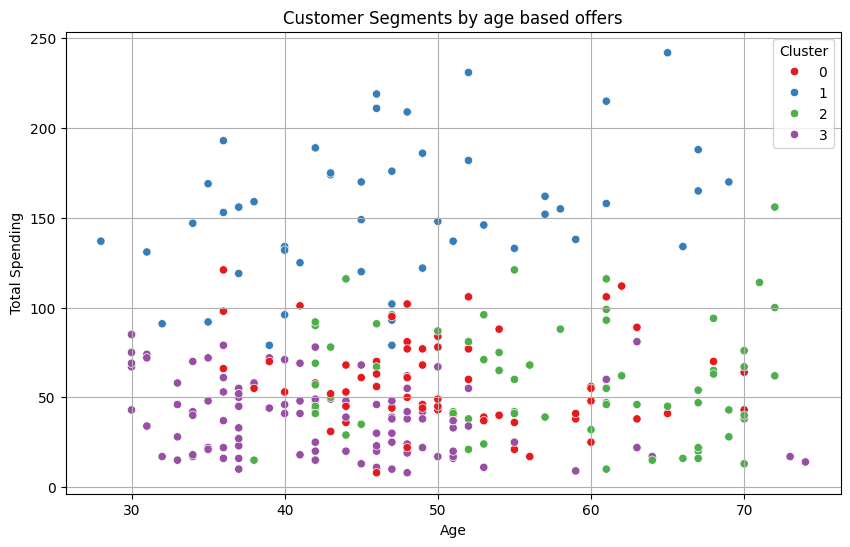

In [49]:
#8.Visualizing clusters by actual features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Spending', y='Campaign_Response', hue='Cluster', palette='Set1')
plt.title('Customer Segments by Marketing Strategy')
plt.xlabel('Total Spending')
plt.ylabel('Campaign Response')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Recency', hue='Cluster', palette='Set1')
plt.title('Customer Segments by Loyalty/Retention')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income_per_head', y='Total_Spending', hue='Cluster', palette='Set1')
plt.title('Customer Segments by value segmentation')
plt.xlabel('Income per head')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Total_Spending', hue='Cluster', palette='Set1')
plt.title('Customer Segments by age based offers')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

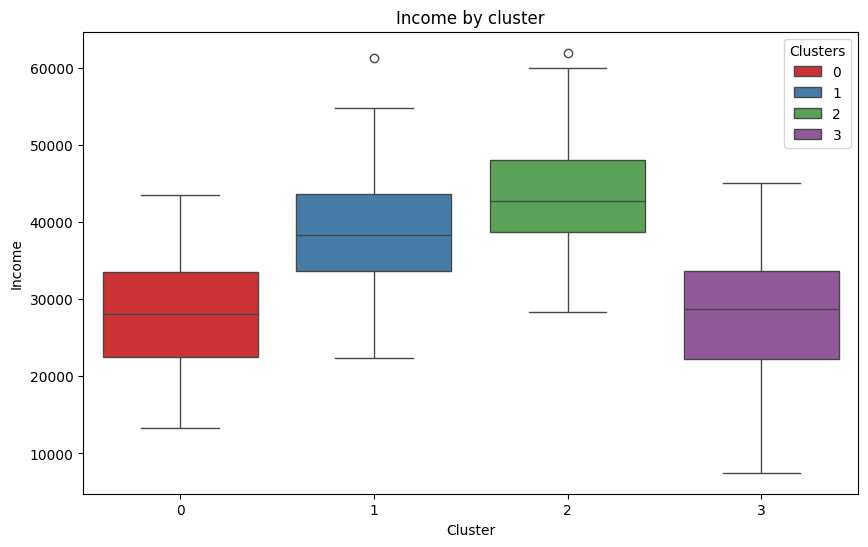

In [50]:
#Box plot for income by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=df,hue='Cluster', palette='Set1')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

In [54]:
# Creating total spending column if not present
if 'Total' not in df.columns:
    df['Total'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Grouping by cluster
summary = df.groupby('Cluster')[['Income', 'Total', 'Recency']].mean().reset_index()
summary = summary.sort_values('Income', ascending=False)

# Print table-style summary
print("\nCluster Summary:\n")
print(tabulate(summary, headers='keys', tablefmt='fancy_grid', showindex=False))

# Detailed insights
print("\nCluster-wise Insights and Recommendations:\n")

print("""
Cluster 2
- Insight:
  Customers in this group have relatively high incomes but show modest overall spending. 
  Despite having strong purchasing power, their engagement with the brand appears limited, 
  which suggests untapped potential.

- Recommendation:
  This segment should be targeted with premium and exclusive product offerings. Personalized 
  recommendations, loyalty rewards, and showcasing high-value bundles can encourage them 
  to increase their spending. Position the brand as aspirational to align with their income level.


Cluster 1
- Insight:
  These customers earn moderately well and have the highest total spending among all clusters. 
  Their purchase frequency and recent activity show that they are actively engaged and valuable.

- Recommendation:
  Maintain their loyalty through regular seasonal campaigns, early access to new products, 
  and points-based reward systems. These customers are the backbone of recurring revenue, 
  so keep them satisfied and involved.


Cluster 3
- Insight:
  This group has lower-than-average income and spending, but they are more recently active 
  compared to others. They may be more price-conscious and responsive to small-value offers.

- Recommendation:
  Offer attractive deals, combo packs, and budget-friendly campaigns tailored to their 
  preferences. Since they’ve interacted recently, now is the right time to convert them into 
  more frequent buyers with well-targeted offers.


Cluster 0
- Insight:
  Customers in this segment have the lowest income and are not actively spending. They also 
  show high recency, meaning they haven’t interacted with the brand in a long time.

- Recommendation:
  This segment is at high risk of churn. Launch reactivation strategies such as “We miss you” 
  emails, special return offers, or first-in-line flash sales. Consider surveying this group 
  to understand their barriers and motivations.
""")


Cluster Summary:

╒═══════════╤══════════╤══════════╤═══════════╕
│   Cluster │   Income │    Total │   Recency │
╞═══════════╪══════════╪══════════╪═══════════╡
│         2 │  43872.4 │  59.7857 │   54.6714 │
├───────────┼──────────┼──────────┼───────────┤
│         1 │  38547.9 │ 151.821  │   47.5357 │
├───────────┼──────────┼──────────┼───────────┤
│         3 │  28418.1 │  40.3636 │   41.2066 │
├───────────┼──────────┼──────────┼───────────┤
│         0 │  27596.2 │  58.2162 │   62.7027 │
╘═══════════╧══════════╧══════════╧═══════════╛

Cluster-wise Insights and Recommendations:


Cluster 2
- Insight:
  Customers in this group have relatively high incomes but show modest overall spending. 
  Despite having strong purchasing power, their engagement with the brand appears limited, 
  which suggests untapped potential.

- Recommendation:
  This segment should be targeted with premium and exclusive product offerings. Personalized 
  recommendations, loyalty rewards, and showcasing hig